<a href="https://colab.research.google.com/github/SarahSouzaPontes/dengueSP/blob/main/DengueSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#História: Dengue em São Paulo - Uma Jornada de Dados e Ação#

Na cidade de São Paulo, uma batalha contra um inimigo invisível: a dengue. Nossa história começa com um conjunto de dados, armazenado em planilhas, contendo informações preciosas sobre os protocolos de serviço relacionados à dengue desde 2019.

No coração desses dados estão as histórias de milhares de cidadãos, expressas em protocolos de serviço. Cada linha da planilha conta uma história: uma solicitação de ajuda, uma reclamação, uma denúncia. E é através dessas histórias que buscamos entender a extensão do problema e encontrar soluções.



#####Engenharia dos Dados####

In [16]:
import pandas as pd

# Carregar o arquivo Excel
df_dengue = pd.read_excel("/content/sample_data/dengue.xlsx")

# Exibir as primeiras linhas do DataFrame
print(df_dengue.head())


   Unnamed: 0  Protocolo        Data de cadastro  \
0       21859          1 2019-01-01 13:05:25.956   
1      178502          2 2019-01-01 16:17:04.144   
2       78164          3 2019-01-01 22:38:35.247   
3       50433          4 2019-01-02 08:29:06.063   
4       12693          5 2019-01-02 09:30:10.632   

                          Caixa de resolução Canal de entrada  \
0     SMS-COVISA-UVIS-Jabaquara/Vila Mariana           PORTAL   
1                SMS-COVISA-UVIS-M'Boi Mirim           MOBILE   
2  SMS-COVISA-UVIS-Vila Maria/Vila Guilherme           PORTAL   
3                   SMS-COVISA-UVIS-Itaquera              CRM   
4  SMS-COVISA-UVIS-Vila Maria/Vila Guilherme              CRM   

                                             Serviço Status atual  \
0  Água limpa e parada ? Solicitar vistoria de lo...   FINALIZADA   
1  Água limpa e parada ? Solicitar vistoria de lo...   FINALIZADA   
2  Água limpa e parada ? Solicitar vistoria de lo...   FINALIZADA   
3  Água limpa e para

In [67]:
df_dengue.shape

(69783, 16)

In [17]:
# Iterar sobre as colunas e imprimir seus nomes
for column in df_dengue.columns:
    print(column)

Unnamed: 0
Protocolo
Data de cadastro
Caixa de resolução
Canal de entrada
Serviço
Status atual
Data do parecer
Último histórico
ID do Serviço
Subprefeitura Operacional
Órgão Público
Tema
Assunto


In [18]:
# Iterar sobre as colunas e imprimir seus valores únicos
for column in df_dengue.columns:
    unique_values = df_dengue[column].unique()
    print(f"Valores únicos da coluna '{column}': {unique_values}")

Valores únicos da coluna 'Unnamed: 0': [ 21859 178502  78164 ... 113509 168882 175483]
Valores únicos da coluna 'Protocolo': [    1     2     3 ... 69781 69782 69783]
Valores únicos da coluna 'Data de cadastro': <DatetimeArray>
['2019-01-01 13:05:25.956000', '2019-01-01 16:17:04.144000',
 '2019-01-01 22:38:35.247000', '2019-01-02 08:29:06.063000',
 '2019-01-02 09:30:10.632000', '2019-01-02 09:45:37.942000',
 '2019-01-02 10:05:22.080000', '2019-01-02 10:06:09.688000',
 '2019-01-02 10:45:27.499000', '2019-01-02 11:42:42.633000',
 ...
 '2024-04-01 22:13:21.385000', '2024-04-01 22:21:30.473000',
 '2024-04-01 22:26:03.014000', '2024-04-01 22:36:36.296000',
 '2024-04-01 22:40:09.905000', '2024-04-01 22:48:56.397000',
 '2024-04-01 22:59:30.072000', '2024-04-01 23:04:11.420000',
 '2024-04-01 23:21:16.012000', '2024-04-01 23:58:22.179000']
Length: 69777, dtype: datetime64[ns]
Valores únicos da coluna 'Caixa de resolução': ['SMS-COVISA-UVIS-Jabaquara/Vila Mariana' "SMS-COVISA-UVIS-M'Boi Mirim"
 

In [19]:
# Converter a coluna 'Data de cadastro' para o formato desejado (apenas YYYYMMDD)
df_dengue['Data de cadastro'] = pd.to_datetime(df_dengue['Data de cadastro']).dt.strftime('%Y%m%d')
df_dengue['Data de cadastro']

0        20190101
1        20190101
2        20190101
3        20190102
4        20190102
           ...   
69778    20240401
69779    20240401
69780    20240401
69781    20240401
69782    20240401
Name: Data de cadastro, Length: 69783, dtype: object

In [20]:
# Converter a coluna 'Data do parecer' para o formato desejado (apenas YYYYMMDD)
df_dengue['Data do parecer'] = pd.to_datetime(df_dengue['Data do parecer']).dt.strftime('%Y%m%d')
df_dengue['Data do parecer']

0        20190416
1        20190130
2        20190226
3        20190111
4        20190123
           ...   
69778    20240401
69779    20240401
69780    20240401
69781    20240401
69782    20240401
Name: Data do parecer, Length: 69783, dtype: object

Investigando se há dados faltantes e se sçao informação, ou falta de dados.

Verificando se há problemas com a data, incosistência entre data de cadastro e parecer

In [22]:
# Converter as colunas 'Data de cadastro' e 'Data do parecer' para o tipo datetime
df_dengue['Data de cadastro'] = pd.to_datetime(df_dengue['Data de cadastro'])
df_dengue['Data do parecer'] = pd.to_datetime(df_dengue['Data do parecer'])

# Criar um filtro para verificar se 'Data do parecer' é anterior a 'Data de cadastro'
filtro = df_dengue['Data do parecer'] < df_dengue['Data de cadastro']

# Aplicar o filtro ao DataFrame original
linhas_com_erro = df_dengue[filtro]

# Verificar se há linhas com erro
if linhas_com_erro.empty:
    print("Não há incoerência com as datas!")
else:
    # Imprimir as linhas com erro
    print("Linhas com 'Data do parecer' anterior a 'Data de cadastro':")
    print(linhas_com_erro[['Data de cadastro', 'Data do parecer']])

    # Imprimir as informações completas das linhas com erro
    print("\nRegistros completos das linhas com erro:")
    print(linhas_com_erro)

Não há incoerência com as datas!


In [68]:
# Verificar valores faltantes e calcular contagem e percentual
missing_values = df_dengue.isnull().sum()
percent_missing = (missing_values / len(df_dengue)) * 100

# Exibir contagem e percentual de valores faltantes em cada coluna
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentual': percent_missing})
print(missing_data)


                           Missing Values  Percentual
Unnamed: 0                              0    0.000000
Protocolo                               0    0.000000
Data de cadastro                        0    0.000000
Caixa de resolução                      0    0.000000
Canal de entrada                        0    0.000000
Serviço                                 0    0.000000
Status atual                            0    0.000000
Data do parecer                         3    0.004299
Último histórico                        3    0.004299
ID do Serviço                           0    0.000000
Subprefeitura Operacional            6001    8.599516
Órgão Público                           0    0.000000
Tema                                    0    0.000000
Assunto                                 0    0.000000
Tempo de Resolução                      3    0.004299
Ano                                     0    0.000000


##Iniciar Análise##

In [26]:
#Explorando os Dados:
#Quantidade de Protocolos por Data de Cadastro:

# Converter a coluna 'Data de cadastro' para o tipo datetime
df_dengue['Data de cadastro'] = pd.to_datetime(df_dengue['Data de cadastro'])

# Agrupar os dados pela coluna 'Data de cadastro' por trimestre e calcular a primeira e última data
trimestres = df_dengue.groupby(df_dengue['Data de cadastro'].dt.to_period('Q')).agg({'Data de cadastro': ['min', 'max']})

# Renomear as colunas para 'Primeira Data' e 'Última Data'
trimestres.columns = ['Primeira Data', 'Última Data']

# Adicionar a coluna 'quantidade_protocolos_por_trimestre'
trimestres['Quantidade de Protocolos'] = df_dengue.groupby(df_dengue['Data de cadastro'].dt.to_period('Q')).size().values

# Imprimir a tabela com a primeira e última data de cada trimestre, juntamente com a quantidade de protocolos
print("Primeira e Última Data de cada Trimestre, e Quantidade de Protocolos:")
print(trimestres)


Primeira e Última Data de cada Trimestre, e Quantidade de Protocolos:
                 Primeira Data Última Data  Quantidade de Protocolos
Data de cadastro                                                    
2019Q1              2019-01-01  2019-03-31                      5178
2019Q2              2019-04-01  2019-06-30                      3472
2019Q3              2019-07-01  2019-09-30                      1010
2019Q4              2019-10-01  2019-12-31                      1201
2020Q1              2020-01-01  2020-03-31                      3416
2020Q2              2020-04-01  2020-06-30                       761
2020Q3              2020-07-01  2020-09-30                       751
2020Q4              2020-10-01  2020-12-31                      1280
2021Q1              2021-01-01  2021-03-31                      2271
2021Q2              2021-04-01  2021-06-30                      1334
2021Q3              2021-07-01  2021-09-30                       572
2021Q4              2021-10-01  2

Quantidade de protocolos abertos em cada trimestre por ano.

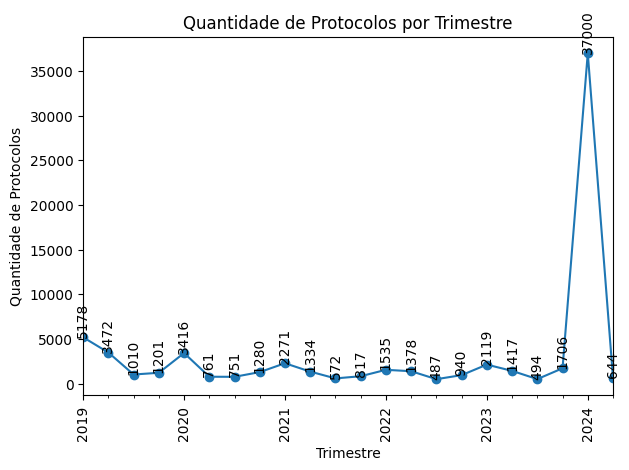

In [32]:
#Calcularemos o número de protocolos cadastrados ao longo do tempo para identificar padrões sazonais ou tendências alarmantes.
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo Excel
df_dengue = pd.read_excel("/content/sample_data/dengue.xlsx")

# Converter a coluna 'Data de cadastro' para o tipo datetime
df_dengue['Data de cadastro'] = pd.to_datetime(df_dengue['Data de cadastro'])

# Agrupar os dados pela coluna 'Data de cadastro' por trimestre e calcular a quantidade de protocolos em cada trimestre
quantidade_protocolos_por_trimestre = df_dengue.groupby(df_dengue['Data de cadastro'].dt.to_period('Q')).size()

# Criar uma figura e eixos
fig, ax = plt.subplots()

# Plotar o gráfico de linha
quantidade_protocolos_por_trimestre.plot(ax=ax, marker='o', linestyle='-')

# Definir o título e os rótulos dos eixos
plt.title("Quantidade de Protocolos por Trimestre")
plt.xlabel("Trimestre")
plt.ylabel("Quantidade de Protocolos")

# Rotacionar os rótulos do eixo x para facilitar a leitura
plt.xticks(rotation=90)

# Adicionar os rótulos dos valores ao gráfico
for i, valor in enumerate(quantidade_protocolos_por_trimestre):
    plt.text(quantidade_protocolos_por_trimestre.index[i], valor, str(valor), ha='center', va='bottom', rotation=90)

# Exibir o gráfico
plt.tight_layout()
plt.show()


In [61]:
# Contar o número de protocolos por serviço
contagem_servico = df_dengue['Serviço'].value_counts()

# Calcular o percentual de protocolos por serviço
percentual_servico = (contagem_servico / len(df_dengue)) * 100

# Exibir os valores únicos da coluna 'Serviço', a contagem e o percentual
print("Valores únicos da coluna 'Serviço':", contagem_servico.index.tolist())
print("Contagem de protocolos por serviço:", contagem_servico)
print("Percentual de protocolos por serviço:")
print(percentual_servico)


Valores únicos da coluna 'Serviço': ['Foco de dengue - Solicitar vistoria de local com água parada', 'Água limpa e parada ? Solicitar vistoria de local com acúmulo']
Contagem de protocolos por serviço: Serviço
Foco de dengue - Solicitar vistoria de local com água parada     40982
Água limpa e parada ? Solicitar vistoria de local com acúmulo    28801
Name: count, dtype: int64
Percentual de protocolos por serviço:
Serviço
Foco de dengue - Solicitar vistoria de local com água parada     58.72777
Água limpa e parada ? Solicitar vistoria de local com acúmulo    41.27223
Name: count, dtype: float64


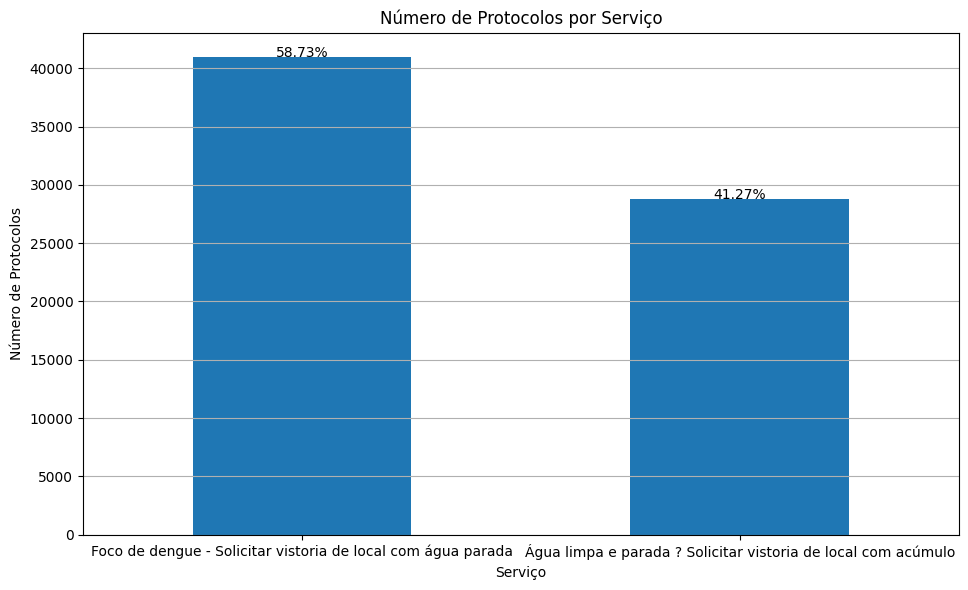

In [60]:
# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = contagem_servico.plot(kind='bar')

# Adicionar rótulos às barras
for i, v in enumerate(contagem_servico):
    ax.text(i, v + 5, str(round(percentual_servico[i], 2)) + '%', ha='center')

plt.title('Número de Protocolos por Serviço')
plt.xlabel('Serviço')
plt.ylabel('Número de Protocolos')
plt.xticks(rotation=0, ha='center')  # Rotacionar os rótulos do eixo x para facilitar a leitura
plt.grid(axis='y')  # Adicionar grade ao eixo y
plt.tight_layout()  # Ajustar layout
plt.show()


In [66]:
import matplotlib.pyplot as plt

# Contar o número de protocolos por último histórico
contagem_historico = df_dengue['Último histórico'].value_counts()

# Calcular o percentual de protocolos por último histórico
percentual_historico = (contagem_historico / len(df_dengue)) * 100

# Exibir os valores únicos da coluna 'Último histórico', a contagem e o percentual
print("Valores únicos da coluna 'Último histórico':", contagem_historico.index.tolist())
print("Contagem de protocolos por último histórico:", contagem_historico)
print("Percentual de protocolos por último histórico:")
print(percentual_historico)





Valores únicos da coluna 'Último histórico': ['FINALIZADO', 'CANCELADO', 'DEMANDA ATRIBUIDA', 'INDEFERIDO', 'AGUARDANDO ANÁLISE', 'REITERAÇÃO', 'RECLASSIFICADA', 'ENCAMINHADO PARA EXECUÇÃO', 'FLUXO REINICIADO', 'TRANSFERENCIA DE DEMANDA', 'AGUARDANDO COMPLEMENTO DE INFORMAÇÕES POR PARTE DO MUNÍCIPE', 'DEMANDA DEVOLVIDA', 'RELACIONADA', 'EM ANDAMENTO']
Contagem de protocolos por último histórico: Último histórico
FINALIZADO                                                     68723
CANCELADO                                                        464
DEMANDA ATRIBUIDA                                                277
INDEFERIDO                                                       262
AGUARDANDO ANÁLISE                                                17
REITERAÇÃO                                                        11
RECLASSIFICADA                                                     7
ENCAMINHADO PARA EXECUÇÃO                                          6
FLUXO REINICIADO                

Valores únicos da coluna 'Status atual': ['FINALIZADA', 'CANCELADA', 'EM_ANDAMENTO', 'ABERTA']
Contagem de protocolos por status atual: Status atual
FINALIZADA      69130
CANCELADA         322
EM_ANDAMENTO      316
ABERTA             15
Name: count, dtype: int64
Percentual de protocolos por status atual:
Status atual
FINALIZADA      99.064242
CANCELADA        0.461430
EM_ANDAMENTO     0.452832
ABERTA           0.021495
Name: count, dtype: float64


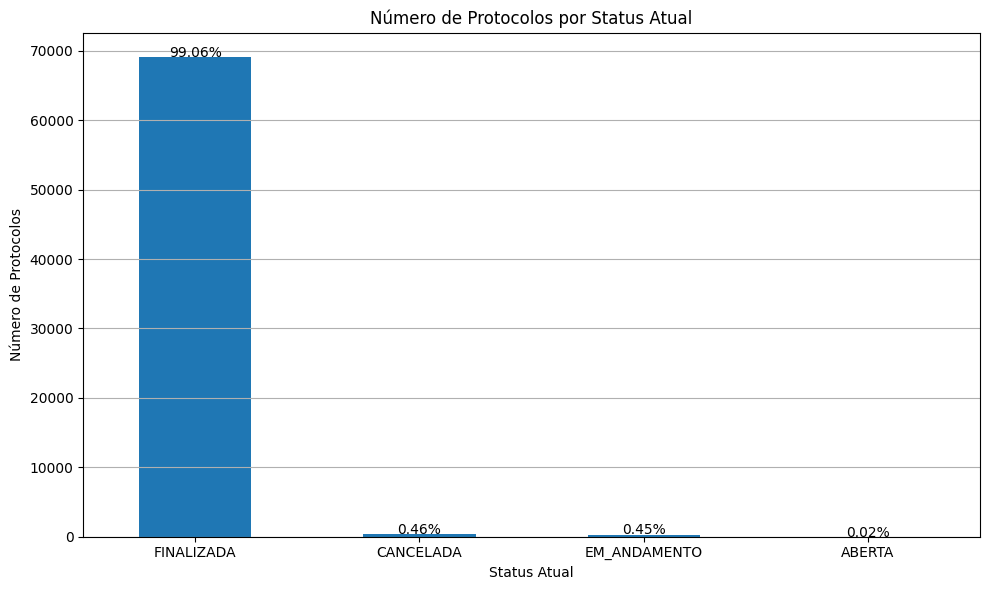

In [62]:
import matplotlib.pyplot as plt

# Contar o número de protocolos por status atual
contagem_status = df_dengue['Status atual'].value_counts()

# Calcular o percentual de protocolos por status atual
percentual_status = (contagem_status / len(df_dengue)) * 100

# Exibir os valores únicos da coluna 'Status atual', a contagem e o percentual
print("Valores únicos da coluna 'Status atual':", contagem_status.index.tolist())
print("Contagem de protocolos por status atual:", contagem_status)
print("Percentual de protocolos por status atual:")
print(percentual_status)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = contagem_status.plot(kind='bar')

# Adicionar rótulos às barras
for i, v in enumerate(contagem_status):
    ax.text(i, v + 5, str(round(percentual_status[i], 2)) + '%', ha='center')

plt.title('Número de Protocolos por Status Atual')
plt.xlabel('Status Atual')
plt.ylabel('Número de Protocolos')
plt.xticks(rotation=0, ha='center')  # Rotacionar os rótulos do eixo x para facilitar a leitura
plt.grid(axis='y')  # Adicionar grade ao eixo y
plt.tight_layout()  # Ajustar layout
plt.show()


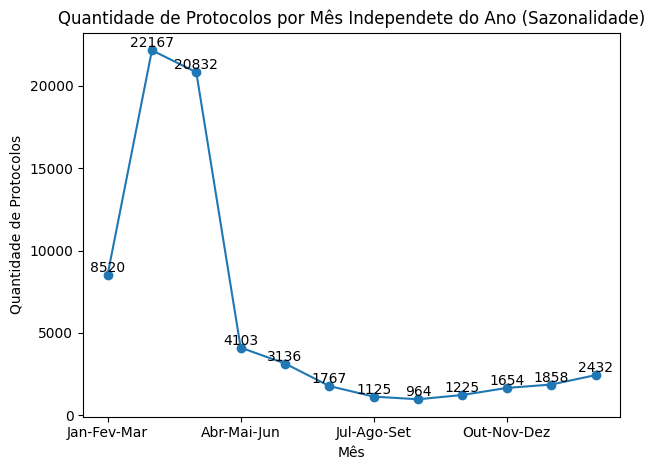

In [35]:
# Converter a coluna 'Data de cadastro' para o tipo datetime
df_dengue['Data de cadastro'] = pd.to_datetime(df_dengue['Data de cadastro'])

# Agrupar os dados pela coluna 'Data de cadastro' por mês (ignorando o ano) e calcular a quantidade de protocolos em cada mês
quantidade_protocolos_por_mes = df_dengue.groupby(df_dengue['Data de cadastro'].dt.month).size()

# Reindexar o resultado para garantir que todos os meses estejam presentes
quantidade_protocolos_por_mes = quantidade_protocolos_por_mes.reindex(range(1, 13), fill_value=0)

# Criar uma figura e eixos
fig, ax = plt.subplots()

# Plotar o gráfico de linha
quantidade_protocolos_por_mes.plot(ax=ax, marker='o', linestyle='-')

# Definir o título e os rótulos dos eixos
plt.title("Quantidade de Protocolos por Mês Independete do Ano (Sazonalidade)")
plt.xlabel("Mês")
plt.ylabel("Quantidade de Protocolos")

# Definir os rótulos dos meses
meses = ['Jan-Fev-Mar', 'Abr-Mai-Jun', 'Jul-Ago-Set', 'Out-Nov-Dez']
plt.xticks(range(1, 13, 3), meses)

# Adicionar os rótulos dos valores ao gráfico
for i, valor in enumerate(quantidade_protocolos_por_mes):
    plt.text(i + 1, valor, str(valor), ha='center', va='bottom')

# Exibir o gráfico
plt.tight_layout()
plt.show()

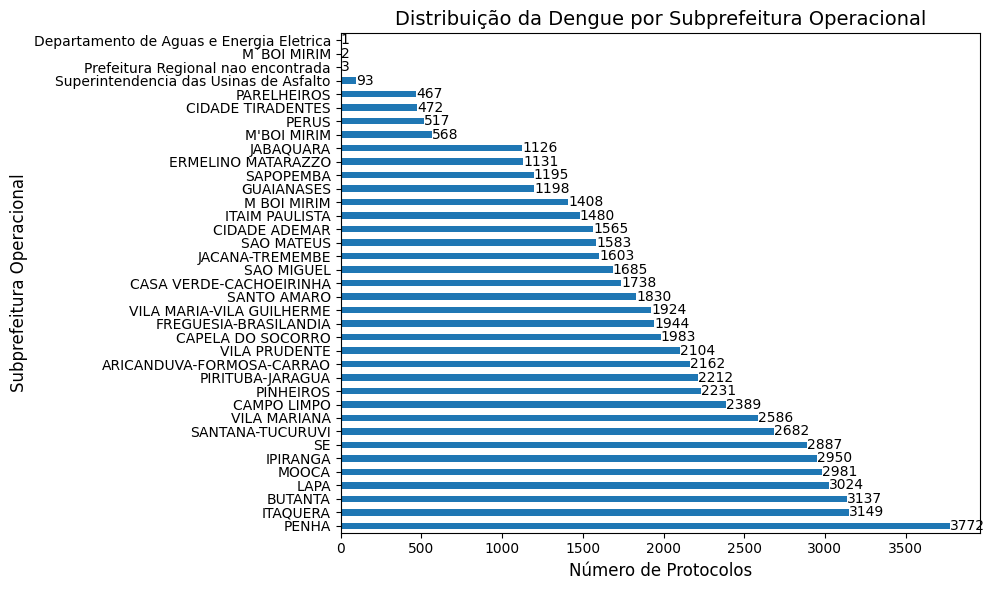

In [38]:
import matplotlib.pyplot as plt



# Definir o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plotar o gráfico de barras horizontal
bars = protocolos_por_subprefeitura.plot(kind='barh')

# Adicionar rótulos aos valores das barras
for i, v in enumerate(protocolos_por_subprefeitura):
    plt.text(v, i, str(v), ha='left', va='center')

# Definir o título e os rótulos dos eixos com fonte menor
plt.title("Distribuição da Dengue por Subprefeitura Operacional", fontsize=14)
plt.xlabel("Número de Protocolos", fontsize=12)
plt.ylabel("Subprefeitura Operacional", fontsize=12)

# Exibir o gráfico com ajustes de layout
plt.tight_layout()
plt.show()


In [39]:
# Criar DataFrame com os dados
tabela_dengue_por_subprefeitura = pd.DataFrame({'Subprefeitura Operacional': protocolos_por_subprefeitura.index,
                                                'Número de Protocolos': protocolos_por_subprefeitura.values})

# Exibir a tabela
print(tabela_dengue_por_subprefeitura)

                   Subprefeitura Operacional  Número de Protocolos
0                                      PENHA                  3772
1                                   ITAQUERA                  3149
2                                    BUTANTA                  3137
3                                       LAPA                  3024
4                                      MOOCA                  2981
5                                   IPIRANGA                  2950
6                                         SE                  2887
7                           SANTANA-TUCURUVI                  2682
8                               VILA MARIANA                  2586
9                                CAMPO LIMPO                  2389
10                                 PINHEIROS                  2231
11                          PIRITUBA-JARAGUA                  2212
12                 ARICANDUVA-FORMOSA-CARRAO                  2162
13                             VILA PRUDENTE                  

In [43]:
#Principais Temas e Assuntos:

#Identificaremos os temas mais recorrentes nas solicitações dos cidadãos, como focos de mosquito, descarte irregular de lixo, entre outros.
#Status dos Serviços:

# Contar a frequência dos temas
frequencia_temas = df_dengue['Tema'].value_counts()

# Contar a frequência dos assuntos
frequencia_assuntos = df_dengue['Assunto'].value_counts()

# Exibir os temas mais recorrentes
print("Temas mais recorrentes:")
print(frequencia_temas.head(10))

# Exibir os assuntos mais recorrentes
print("\nAssuntos mais recorrentes:")
print(frequencia_assuntos.head(10))


Temas mais recorrentes:
Tema
Animais           68463
Pragas urbanas     1313
Saúde                 4
Causa animal          3
Name: count, dtype: int64

Assuntos mais recorrentes:
Assunto
Dengue/chikungunya/zika (mosquito aedes aegypti)             69779
Saúde -> Dengue/chikungunya/zika (mosquito aedes aegypti)        4
Name: count, dtype: int64


Valores únicos da coluna 'Canal de entrada': ['CRM', 'PORTAL', 'CHATBOT', 'MOBILE', 'RESOLUCAO']
Contagem de protocolos por canal de entrada: Canal de entrada
CRM          34201
PORTAL       17855
CHATBOT      16660
MOBILE        1042
RESOLUCAO       25
Name: count, dtype: int64
Percentual de protocolos por canal de entrada:
Canal de entrada
CRM          49.010504
PORTAL       25.586461
CHATBOT      23.874009
MOBILE        1.493200
RESOLUCAO     0.035825
Name: count, dtype: float64


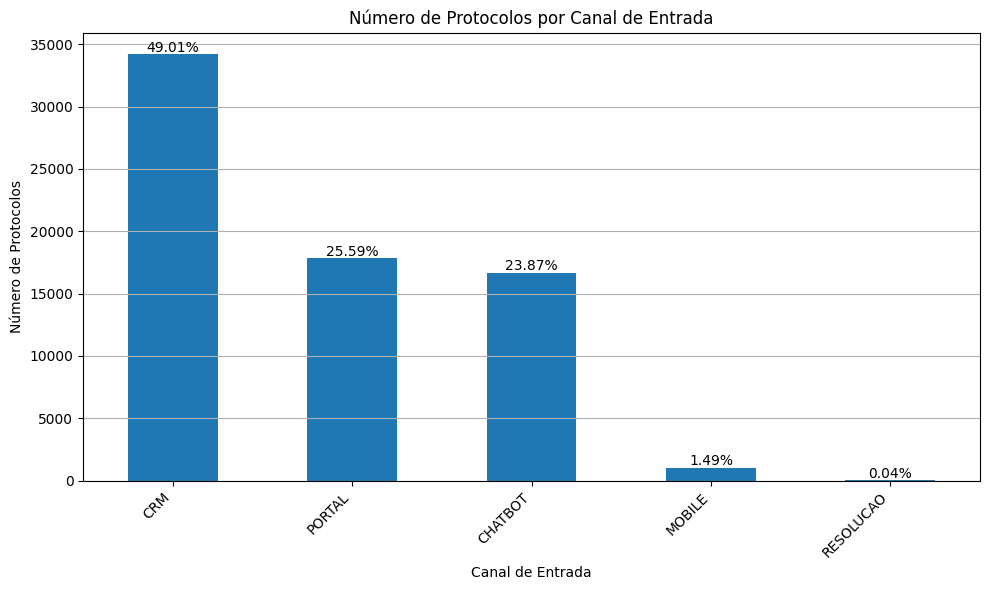

In [69]:
import matplotlib.pyplot as plt

# Contar o número de protocolos por canal de entrada
contagem_canal_entrada = df_dengue['Canal de entrada'].value_counts()

# Calcular o percentual de protocolos por canal de entrada
percentual_canal_entrada = (contagem_canal_entrada / len(df_dengue)) * 100

# Exibir os valores únicos da coluna 'Canal de entrada', a contagem e o percentual
print("Valores únicos da coluna 'Canal de entrada':", contagem_canal_entrada.index.tolist())
print("Contagem de protocolos por canal de entrada:", contagem_canal_entrada)
print("Percentual de protocolos por canal de entrada:")
print(percentual_canal_entrada)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = contagem_canal_entrada.plot(kind='bar')

# Adicionar rótulos às barras
for i, v in enumerate(contagem_canal_entrada):
    ax.text(i, v + 200, str(round(percentual_canal_entrada[i], 2)) + '%', ha='center')

plt.title('Número de Protocolos por Canal de Entrada')
plt.xlabel('Canal de Entrada')
plt.ylabel('Número de Protocolos')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para facilitar a leitura
plt.grid(axis='y')  # Adicionar grade ao eixo y
plt.tight_layout()  # Ajustar layout
plt.show()



In [46]:
# Calcular o tempo médio de resolução dos protocolos
tempo_medio_resolucao = df_dengue['Tempo de Resolução'].mean()

# Extrair o número de dias
dias = tempo_medio_resolucao.days

# Extrair o tempo restante (horas, minutos e segundos) e formatá-lo
tempo_restante = tempo_medio_resolucao - pd.Timedelta(days=dias)
horas = tempo_restante.seconds // 3600
minutos = (tempo_restante.seconds % 3600) // 60
segundos = tempo_restante.seconds % 60

# Exibir o tempo médio de resolução formatado
print("Tempo médio de resolução dos protocolos:", dias, "dias", horas, "horas", minutos, "minutos", segundos, "segundos")


Tempo médio de resolução dos protocolos: 34 dias 15 horas 39 minutos 11 segundos


In [47]:
# Calcular o tempo mínimo de resolução dos protocolos
tempo_minimo = df_dengue['Tempo de Resolução'].min()

# Calcular o tempo máximo de resolução dos protocolos
tempo_maximo = df_dengue['Tempo de Resolução'].max()

# Calcular a mediana do tempo de resolução dos protocolos
tempo_mediana = df_dengue['Tempo de Resolução'].median()

# Exibir os resultados formatados
print("Tempo mínimo de resolução dos protocolos:", tempo_minimo.days, "dias", tempo_minimo.seconds // 3600, "horas", (tempo_minimo.seconds % 3600) // 60, "minutos", tempo_minimo.seconds % 60, "segundos")
print("Tempo máximo de resolução dos protocolos:", tempo_maximo.days, "dias", tempo_maximo.seconds // 3600, "horas", (tempo_maximo.seconds % 3600) // 60, "minutos", tempo_maximo.seconds % 60, "segundos")
print("Tempo mediano de resolução dos protocolos:", tempo_mediana.days, "dias", tempo_mediana.seconds // 3600, "horas", (tempo_mediana.seconds % 3600) // 60, "minutos", tempo_mediana.seconds % 60, "segundos")


Tempo mínimo de resolução dos protocolos: 0 dias 0 horas 0 minutos 3 segundos
Tempo máximo de resolução dos protocolos: 1576 dias 2 horas 46 minutos 12 segundos
Tempo mediano de resolução dos protocolos: 19 dias 22 horas 17 minutos 4 segundos


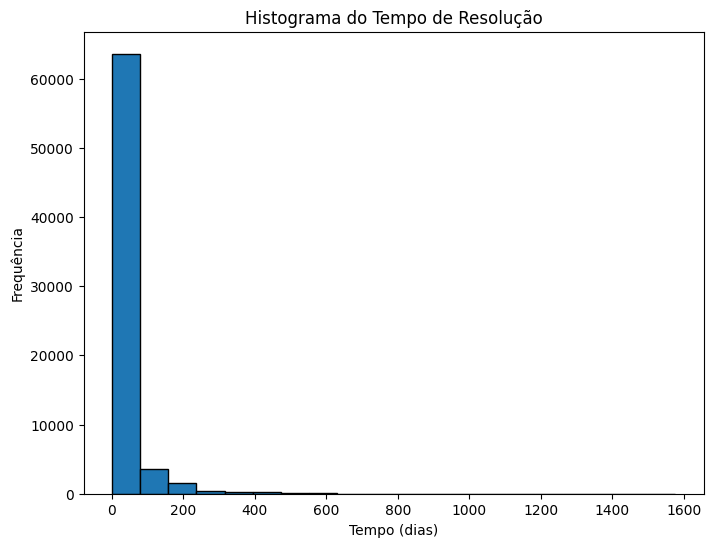

In [52]:
#Distribuição do tempo de resolução dos protocolos
# Criar uma figura
plt.figure(figsize=(8, 6))

# Plotar o histograma
plt.hist(df_dengue['Tempo de Resolução'].dt.total_seconds() / (60*60*24), bins=20, edgecolor='black')
plt.title('Histograma do Tempo de Resolução')
plt.xlabel('Tempo (dias)')
plt.ylabel('Frequência')

# Exibir o histograma
plt.show()

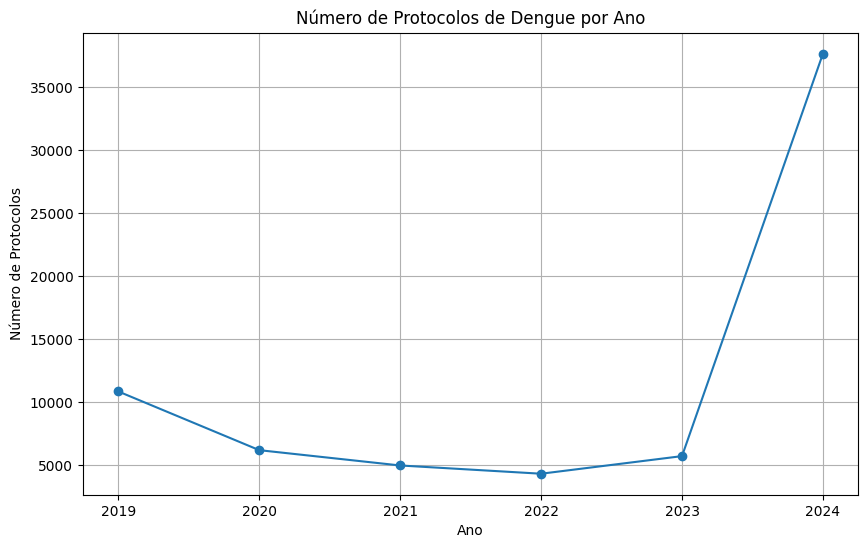

In [53]:
#Análise Temporal:
#"Ao longo dos anos, observamos um aumento preocupante no número de protocolos de serviço relacionados à dengue. Esse aumento pode indicar uma escalada da crise, necessitando de maior conscientização da população sobre a importância da prevenção casos de dengue."

# Converter a coluna 'Data de cadastro' para o tipo datetime
df_dengue['Data de cadastro'] = pd.to_datetime(df_dengue['Data de cadastro'])

# Extrair o ano da coluna 'Data de cadastro'
df_dengue['Ano'] = df_dengue['Data de cadastro'].dt.year

# Contar o número de protocolos por ano
protocolos_por_ano = df_dengue.groupby('Ano').size()

# Plotar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(protocolos_por_ano.index, protocolos_por_ano.values, marker='o', linestyle='-')
plt.title('Número de Protocolos de Dengue por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Protocolos')
plt.grid(True)
plt.show()

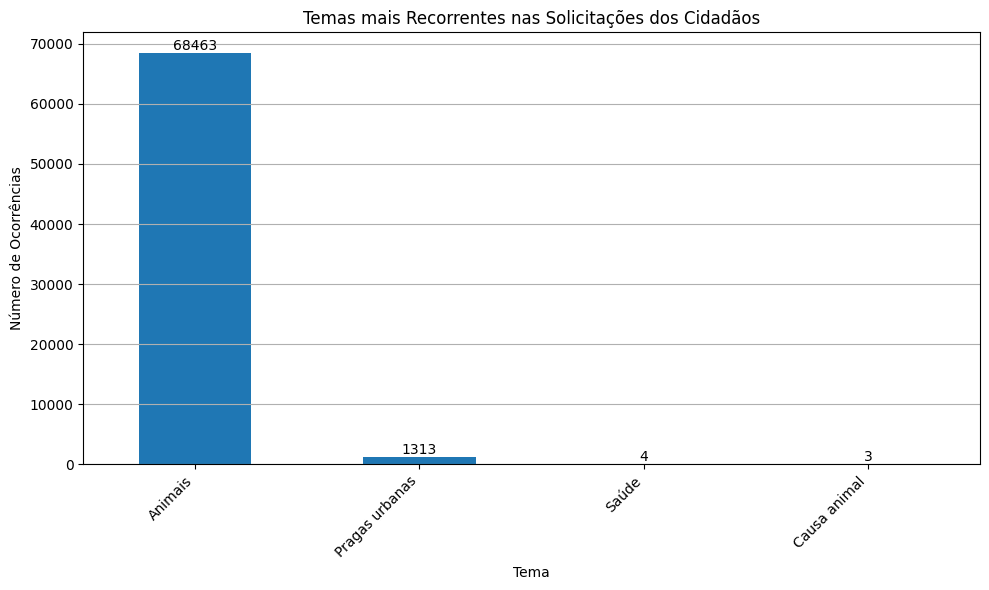

In [56]:
import matplotlib.pyplot as plt

# Contar a frequência de ocorrência de cada tema
temas_recorrentes = df_dengue['Tema'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = temas_recorrentes.plot(kind='bar')
plt.title('Temas mais Recorrentes nas Solicitações dos Cidadãos')
plt.xlabel('Tema')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para facilitar a leitura
plt.grid(axis='y')  # Adicionar grade ao eixo y

# Adicionar rótulos nas barras
for i, valor in enumerate(temas_recorrentes):
    ax.annotate(str(valor), xy=(i, valor), ha='center', va='bottom')

plt.tight_layout()  # Ajustar layout
plt.show()


**Dicionário de Dados:**

Protocolo: Número único identificador do protocolo de serviço.

Data de Cadastro: Data em que o protocolo foi registrado no sistema.

Caixa de Resolução: Status atual do protocolo (aberto, em andamento, concluído, etc.).

Canal de Entrada: Canal utilizado pelo cidadão para registrar o protocolo (telefone, portal, aplicativo, etc.).

Serviço: Tipo de serviço relacionado à dengue.

Status Atual: Situação atual do protocolo (em análise, encaminhado para órgão competente, etc.).

Data do Parecer: Data em que foi emitido o parecer sobre o protocolo.

Último Histórico: Breve descrição da última atualização do protocolo.

ID do Serviço: Identificador único do tipo de serviço.

Subprefeitura Operacional: Subprefeitura responsável pela área geográfica em que o protocolo foi registrado.

Órgão Público: Órgão responsável pelo serviço relacionado à dengue.

Tema: Categoria geral do assunto do protocolo.

Assunto: Detalhamento específico do assunto do protocolo.
Com uma compreensão mais profunda dos dados e uma narrativa convincente, estamos prontos para transformar essas informações em ações concretas para combater a dengue e proteger nossa cidade.
